In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix

In [7]:
data = 'C:\\Users\\student.IBM-40\\Downloads\\car_evaluation.csv'
df = pd.read_csv(data)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [10]:
X = df.drop("class", axis=1)
y = df["class"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
X_train.shape, X_test.shape

((1381, 6), (346, 6))

In [18]:
encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [19]:
giniclf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

In [20]:
giniclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
ypred = giniclf.predict(X_test)
ypredtrain = giniclf.predict(X_train)

In [22]:
print('Model accuracy : {0:0.4f}'.format(accuracy_score(y_test, ypred)))
print('Model accuracy : {0:0.4f}'.format(accuracy_score(y_train, ypredtrain)))

Model accuracy : 0.7890
Model accuracy : 0.8096


In [23]:
print('Training set score: {:.4f}'.format(giniclf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(giniclf.score(X_test, y_test)))

Training set score: 0.8096
Test set score: 0.7890


[Text(0.4, 0.875, 'x[3] <= 1.5\ngini = 0.454\nsamples = 1381\nvalue = [307, 55, 970, 49]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 463\nvalue = [0, 0, 463, 0]'),
 Text(0.6, 0.625, 'x[5] <= 2.5\ngini = 0.577\nsamples = 918\nvalue = [307, 55, 507, 49]'),
 Text(0.4, 0.375, 'x[1] <= 3.5\ngini = 0.627\nsamples = 616\nvalue = [307, 55, 205, 49]'),
 Text(0.2, 0.125, 'gini = 0.623\nsamples = 464\nvalue = [254, 55, 106, 49]'),
 Text(0.6, 0.125, 'gini = 0.454\nsamples = 152\nvalue = [53, 0, 99, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 302\nvalue = [0, 0, 302, 0]')]

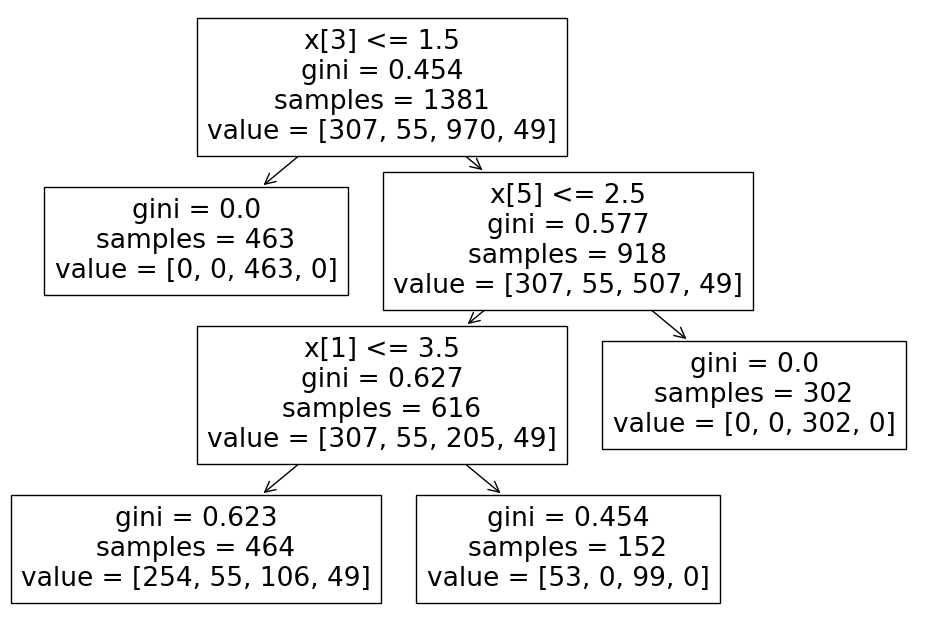

In [24]:
plt.figure(figsize = (12,8))
tree.plot_tree(giniclf.fit(X_train, y_train))

In [25]:
newtree = tree.export_graphviz(giniclf,out_file = None, feature_names = X_train.columns, class_names = y_train, filled = True, rounded = True, special_characters = True)

In [29]:
graph = graphviz.Source(newtree)
graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [30]:
enclf = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state = 0)

In [31]:
enclf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [32]:
ypreden = enclf.predict(X_test)
ypredten = enclf.predict(X_train)

In [33]:
print('Model accuracy for training data: {0:0.4f}'.format(accuracy_score(y_train, ypredten)))
print('Model accuracy for test data: {0:0.4f}'.format(accuracy_score(y_test,ypreden)))

Model accuracy for training data: 0.8096
Model accuracy for test data: 0.7890


In [34]:
print('Training set score:{:.4f}'.format(enclf.score(X_train,y_train)))
print('Test set score:{:.4f}'.format(enclf.score(X_test,y_test)))

Training set score:0.8096
Test set score:0.7890


[Text(0.4, 0.875, 'x[3] <= 1.5\nentropy = 1.196\nsamples = 1381\nvalue = [307, 55, 970, 49]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 463\nvalue = [0, 0, 463, 0]'),
 Text(0.6, 0.625, 'x[5] <= 2.5\nentropy = 1.47\nsamples = 918\nvalue = [307, 55, 507, 49]'),
 Text(0.4, 0.375, 'x[1] <= 3.5\nentropy = 1.631\nsamples = 616\nvalue = [307, 55, 205, 49]'),
 Text(0.2, 0.125, 'entropy = 1.67\nsamples = 464\nvalue = [254, 55, 106, 49]'),
 Text(0.6, 0.125, 'entropy = 0.933\nsamples = 152\nvalue = [53, 0, 99, 0]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 302\nvalue = [0, 0, 302, 0]')]

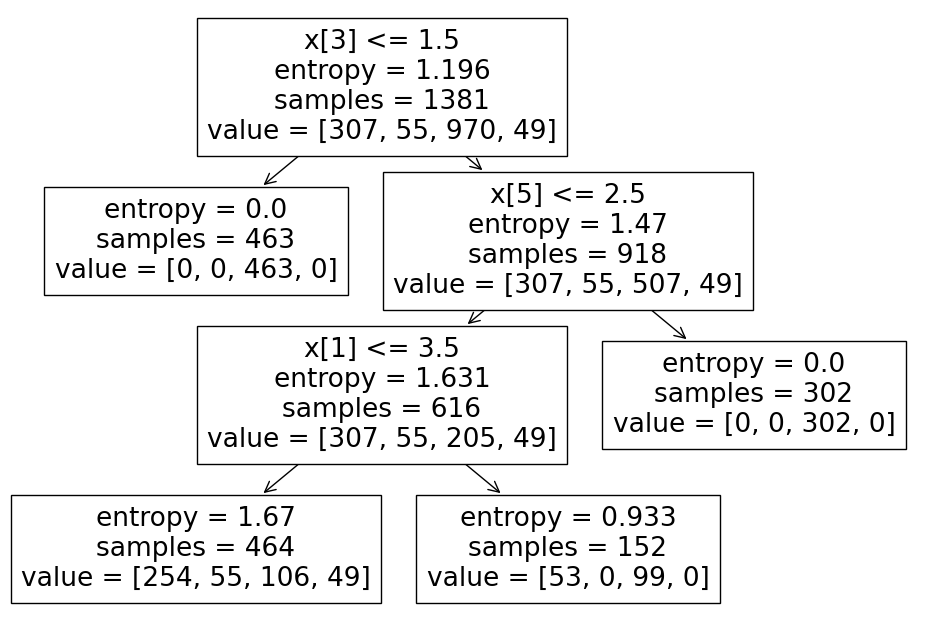

In [35]:
plt.figure(figsize = (12,8))
tree.plot_tree(enclf.fit(X_train,y_train))

In [36]:
newtreeen = tree.export_graphviz(enclf, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(newtreeen) 

graph 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [37]:
cm = confusion_matrix(y_test,ypreden)
print('Confusion Matrix\n',cm)

Confusion Matrix
 [[ 58   0  19   0]
 [ 14   0   0   0]
 [ 24   0 215   0]
 [ 16   0   0   0]]
